In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [3]:
df=pd.read_csv("forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
pd.set_option("display.max_columns", 31)
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [8]:
month_df = df.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_df.head(10)

,size_category,month,count
11,small,aug,141
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42
15,small,jul,23
16,small,jun,14
13,small,feb,14
6,large,mar,12
20,small,oct,11


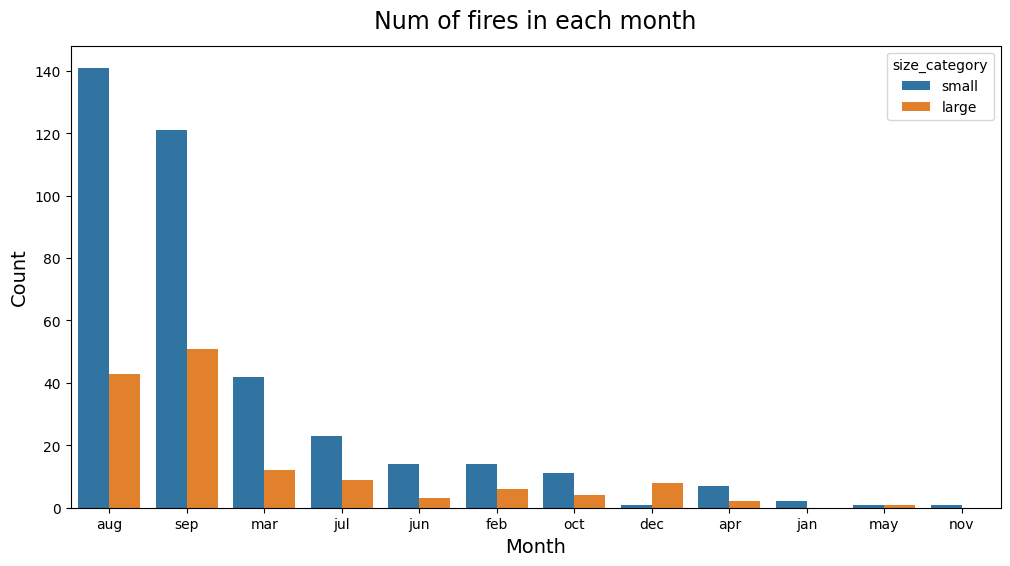

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(x='month', y = 'count', hue='size_category', data= month_df)
plt.title("Num of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Aug month has seen highest number of small fires. Whereas sep month has seen highest num of large fires.

In [49]:
data1 = df

In [40]:
size_map = {"small":0, "large":1}
data1["SizeCat"] = data1["size_category"].map(size_map)
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,SizeCat
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small,0


In [52]:
data1.shape

(517, 29)

In [53]:
x = df.iloc[:,0:28]
y = df.iloc[:,28]

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=10)

## Outliers

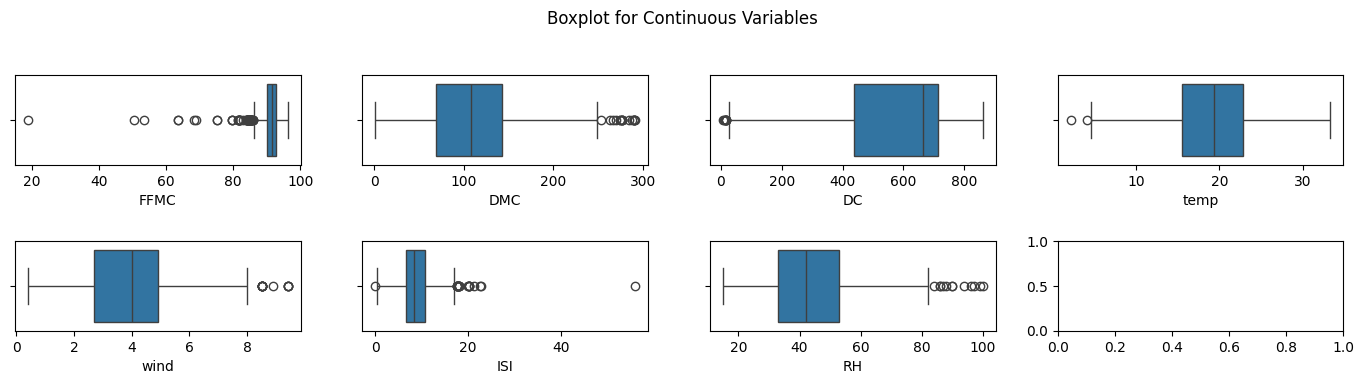

In [21]:
fig, ax=plt.subplots(2,4, figsize=(14,4), sharex= False, sharey = False)
sns.boxplot(df.FFMC, ax=ax[0,0],orient = 'h')
sns.boxplot(df.DMC, ax=ax[0,1],orient = 'h')
sns.boxplot(df.DC, ax=ax[0,2],orient = 'h')
sns.boxplot(df.temp, ax=ax[0,3],orient = 'h')
sns.boxplot(df.wind, ax=ax[1,0],orient = 'h')
sns.boxplot(df.ISI, ax=ax[1,1],orient = 'h')
sns.boxplot(df.RH, ax=ax[1,2],orient = 'h')
plt.suptitle("Boxplot for Continuous Variables")
plt.tight_layout(pad=2.0)

Very noisy data

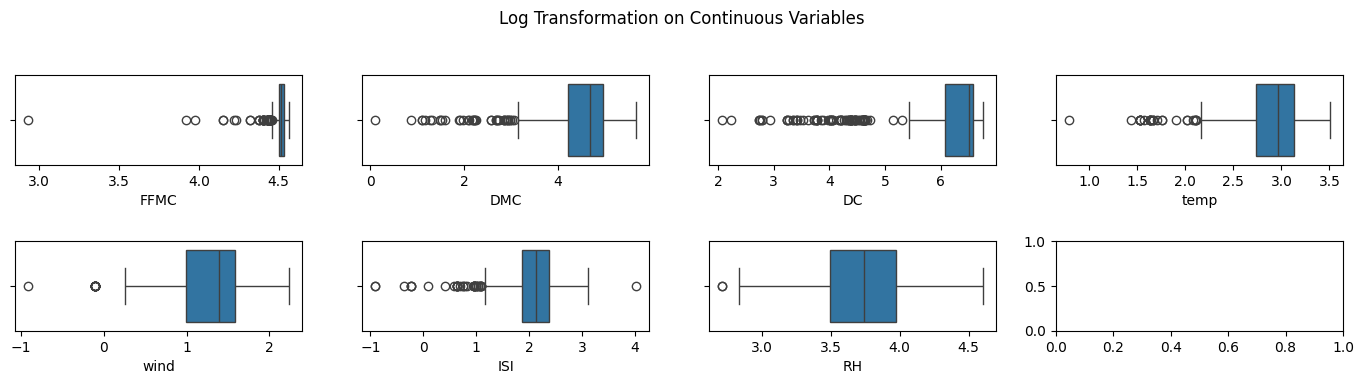

In [22]:
# trying to fix by log tranformations
fig, ax=plt.subplots(2,4, figsize=(14,4), sharex= False, sharey = False)
sns.boxplot(np.log(df.FFMC), ax=ax[0,0],orient = 'h')
sns.boxplot(np.log(df.DMC), ax=ax[0,1],orient = 'h')
sns.boxplot(np.log(df.DC), ax=ax[0,2],orient = 'h')
sns.boxplot(np.log(df.temp), ax=ax[0,3],orient = 'h')
sns.boxplot(np.log(df.wind), ax=ax[1,0],orient = 'h')
sns.boxplot(np.log(df.ISI), ax=ax[1,1],orient = 'h')
sns.boxplot(np.log(df.RH), ax=ax[1,2],orient = 'h')
plt.suptitle("Log Transformation on Continuous Variables")
plt.tight_layout(pad=2.0)

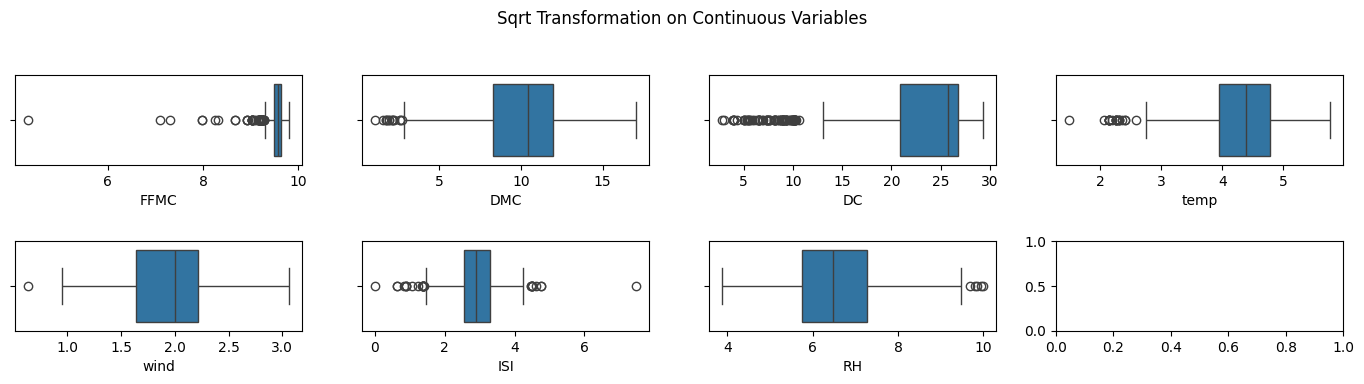

In [25]:
# trying to fix by sqrt transformations
fig, ax=plt.subplots(2,4, figsize=(14,4), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.FFMC), ax=ax[0,0],orient = 'h')
sns.boxplot(np.sqrt(df.DMC), ax=ax[0,1],orient = 'h')
sns.boxplot(np.sqrt(df.DC), ax=ax[0,2],orient = 'h')
sns.boxplot(np.sqrt(df.temp), ax=ax[0,3],orient = 'h')
sns.boxplot(np.sqrt(df.wind), ax=ax[1,0],orient = 'h')
sns.boxplot(np.sqrt(df.ISI), ax=ax[1,1],orient = 'h')
sns.boxplot(np.sqrt(df.RH), ax=ax[1,2],orient = 'h')
plt.suptitle("Sqrt Transformation on Continuous Variables")
plt.tight_layout(pad=2.0)

None of the transformations helped in fixing outliers in any of the features.

### Linear SVM

In [55]:
model_linear = SVC(kernel= "linear")
model_linear.fit(x_train,y_train)
preds_linear = model_linear.predict(x_test)
np.mean(preds_linear==y_test)

0.9743589743589743

In [67]:
acc_linear = accuracy_score(y_test, preds_linear)*100
print("Accuracy : ",acc_linear)

Accuracy :  97.43589743589743


### Poly SVM

In [56]:
model_poly = SVC(kernel="poly")
model_poly.fit(x_train,y_train)
preds_poly = model_poly.predict(x_test)
np.mean(preds_poly==y_test)

0.7564102564102564

In [68]:
acc_poly = accuracy_score(y_test, preds_poly)*100
print("Accuracy : ",acc_poly)

Accuracy :  75.64102564102564


### RBF SVM

In [57]:
model_rbf = SVC(kernel="rbf")
model_rbf.fit(x_train,y_train)
preds_rbf=model_rbf.predict(x_test)
np.mean(preds_rbf==y_test)

0.7307692307692307

In [69]:
acc_rbf = accuracy_score(y_test, preds_rbf)*100
print("Accuracy : ",acc_rbf)

Accuracy :  73.07692307692307


## Model Evaluation

In [58]:
from sklearn.metrics import classification_report
model=SVC()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84       155
           1       0.02      1.00      0.05         1

    accuracy                           0.73       156
   macro avg       0.51      0.86      0.44       156
weighted avg       0.99      0.73      0.84       156



In [59]:
np.mean(pred==y_test)

0.7307692307692307

### Grid Search CV RBF

In [60]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10],'C':[15,14,13,12] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12], 'gamma': [50, 5, 10],
                          'kernel': ['rbf']}])

In [61]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.7340840840840841)

### Grid Search CV Using Sigmoid

In [62]:
clf3 = SVC()
param_grid = [{'kernel':['sigmoid'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['sigmoid']}])

In [63]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'sigmoid'}, 0.7340840840840841)